In [168]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from datetime import datetime,timedelta

In [169]:
ticker_symbol = "MSFT"
df_mcd = yf.download(ticker_symbol)

# Print the first few rows of the DataFrame
df_mcd.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400


In [170]:
df_mcd.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600
2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100
2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600
2023-10-23,325.470001,332.730011,324.390015,329.320007,329.320007,24374700
2023-10-24,331.299988,331.839996,327.600006,330.529999,330.529999,26585446


<Axes: xlabel='Date'>

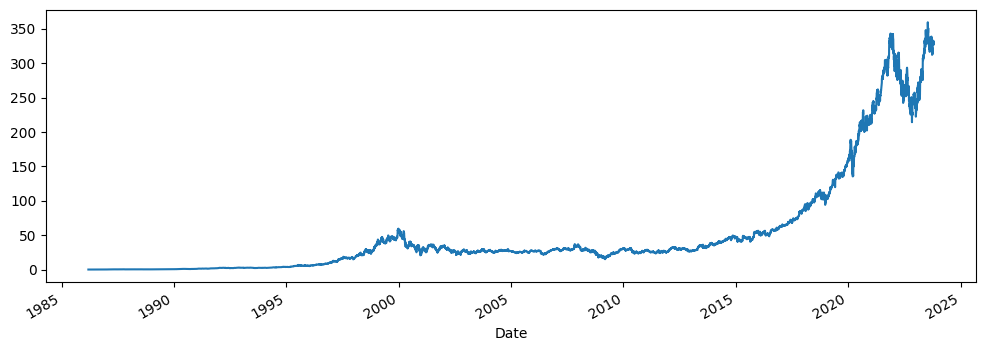

In [171]:
df_mcd['Close'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

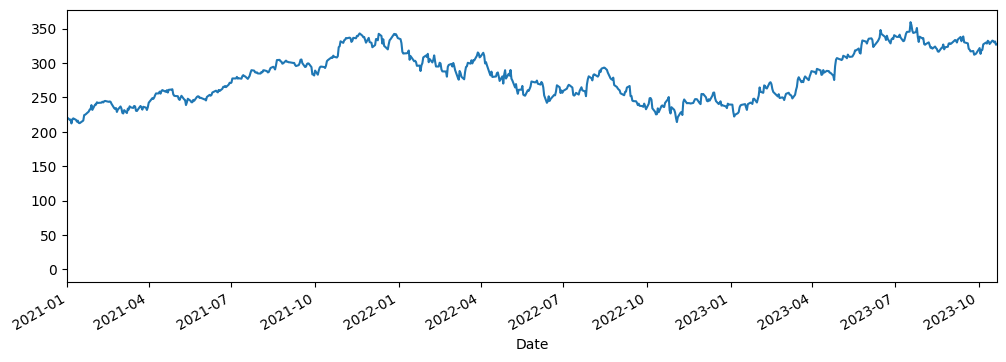

In [172]:
df_mcd['Close'].plot(xlim=['2021-01-01','2023-10-21'],figsize=(12,4))

<Axes: xlabel='Date'>

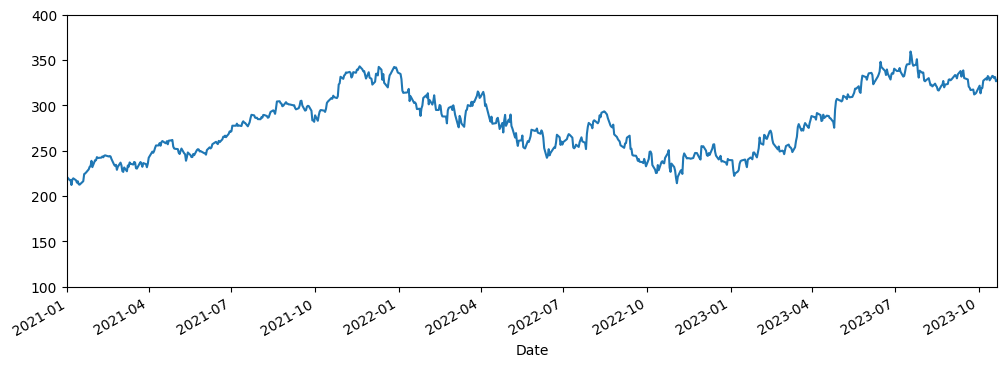

In [173]:
df_mcd['Close'].plot(xlim=['2021-01-01','2023-10-21'],ylim=[100,400],figsize=(12,4))

In [174]:
df_mcd.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-23', '2023-10-24'],
              dtype='datetime64[ns]', name='Date', length=9481, freq=None)

In [175]:
index=df_mcd.loc['2021-01-01':'2023-10-21'].index
index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
               '2023-10-13', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20'],
              dtype='datetime64[ns]', name='Date', length=705, freq=None)

In [176]:
share_open=df_mcd.loc['2021-01-01':'2023-10-21']['Close']
share_open.head()

Date
2021-01-04    217.690002
2021-01-05    217.899994
2021-01-06    212.250000
2021-01-07    218.289993
2021-01-08    219.619995
Name: Close, dtype: float64

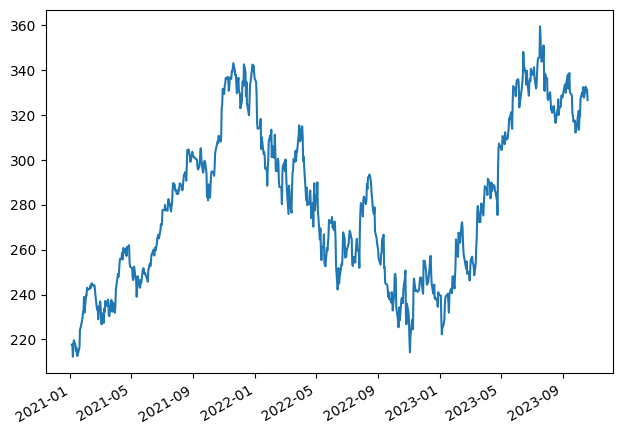

In [177]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [178]:
## Datetime Index
df_mcd=df_mcd.reset_index()
df_mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9481 non-null   datetime64[ns]
 1   Open       9481 non-null   float64       
 2   High       9481 non-null   float64       
 3   Low        9481 non-null   float64       
 4   Close      9481 non-null   float64       
 5   Adj Close  9481 non-null   float64       
 6   Volume     9481 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 518.6 KB


In [179]:
df_mcd=df_mcd.set_index('Date',drop=True)
df_mcd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...
2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600
2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100
2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600


In [180]:
df_mcd.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-12-31,0.088542,0.092014,0.088542,0.090278,0.056083,2304000
1987-12-31,0.165799,0.169271,0.164931,0.165799,0.102998,12643200
1988-12-31,0.319444,0.321181,0.314236,0.319444,0.198446,11462400
1989-12-31,0.322049,0.322917,0.317708,0.322917,0.200603,14198400
1990-12-31,0.591146,0.604167,0.583333,0.598090,0.371547,13550400
1991-12-31,1.027778,1.045139,1.013889,1.020833,0.634164,15009600
1992-12-31,2.125000,2.156250,2.046875,2.085938,1.295831,3705600
1993-12-31,2.226563,2.265625,2.199219,2.218750,1.378336,6403200
1994-12-31,2.453125,2.484375,2.437500,2.457031,1.526362,12563200


In [181]:
df_mcd.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-12-31,0.177083,0.177951,0.175347,0.177083,0.110008,1031788800
1987-12-31,0.548611,0.550347,0.510417,0.548611,0.340809,324000000
1988-12-31,0.484375,0.489583,0.475694,0.483507,0.300365,228960000
1989-12-31,0.618056,0.619792,0.607639,0.614583,0.381792,788688000
1990-12-31,1.102431,1.121528,1.090278,1.100694,0.683776,303321600
1991-12-31,2.307292,2.333333,2.281250,2.317708,1.439811,191630400
1992-12-31,2.937500,2.968750,2.929688,2.968750,1.844253,309884800
1993-12-31,2.992188,3.062500,2.976563,3.007813,1.868520,287936000
1994-12-31,4.046875,4.070313,4.031250,4.039063,2.509155,764504000


<Axes: xlabel='Date'>

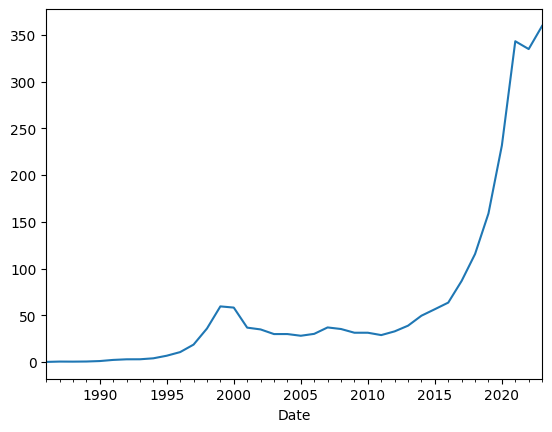

In [182]:
##rule=A:year end frequency
df_mcd.resample(rule='A').max()['Close'].plot()

<Axes: xlabel='Date'>

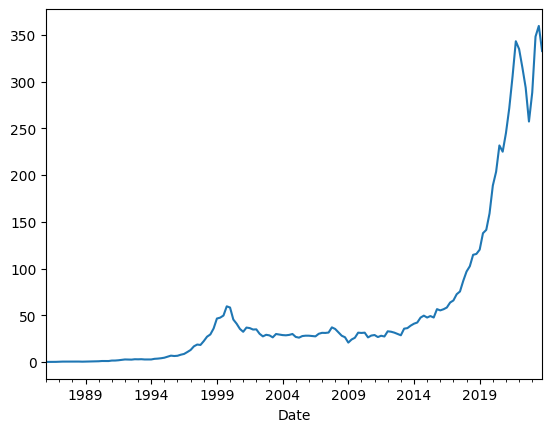

In [183]:
df_mcd.resample(rule='QS').max()['Close'].plot()

In [184]:
df_mcd.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-12-31,0.177083,0.177951,0.175347,0.177083,0.110008,1031788800
1987-12-31,0.548611,0.550347,0.510417,0.548611,0.340809,324000000
1988-12-30,0.484375,0.489583,0.475694,0.483507,0.300365,228960000
1989-12-29,0.618056,0.619792,0.607639,0.614583,0.381792,788688000
1990-12-31,1.102431,1.121528,1.090278,1.100694,0.683776,303321600
1991-12-31,2.307292,2.333333,2.281250,2.317708,1.439811,191630400
1992-12-31,2.937500,2.968750,2.929688,2.968750,1.844253,309884800
1993-12-31,2.992188,3.062500,2.976563,3.007813,1.868520,287936000
1994-12-30,4.046875,4.070313,4.031250,4.039063,2.509155,764504000


<Axes: xlabel='Date'>

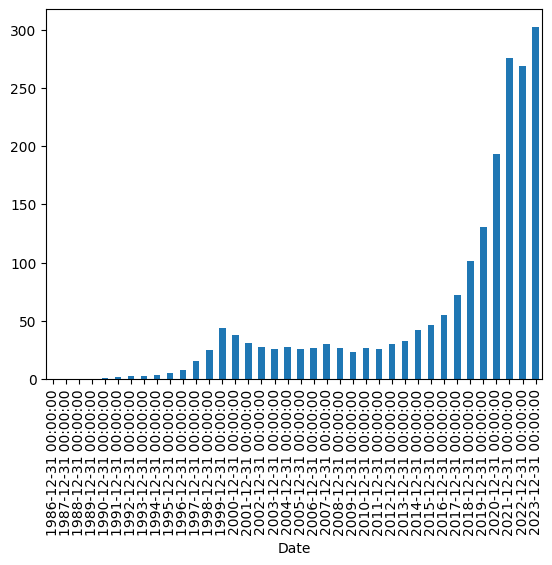

In [185]:
##plotting
df_mcd['Close'].resample(rule='A').mean().plot(kind='bar')

In [186]:
df_mcd['Close'].rolling(11).max().head(20)

Date
1986-03-13         NaN
1986-03-14         NaN
1986-03-17         NaN
1986-03-18         NaN
1986-03-19         NaN
1986-03-20         NaN
1986-03-21         NaN
1986-03-24         NaN
1986-03-25         NaN
1986-03-26         NaN
1986-03-27    0.102431
1986-03-31    0.102431
1986-04-01    0.102431
1986-04-02    0.099826
1986-04-03    0.098090
1986-04-04    0.096354
1986-04-07    0.096354
1986-04-08    0.096354
1986-04-09    0.097222
1986-04-10    0.098090
Name: Close, dtype: float64

In [187]:
df_mcd['Close:30 days rolling']=df_mcd['Close'].rolling(30).mean()

<Axes: xlabel='Date'>

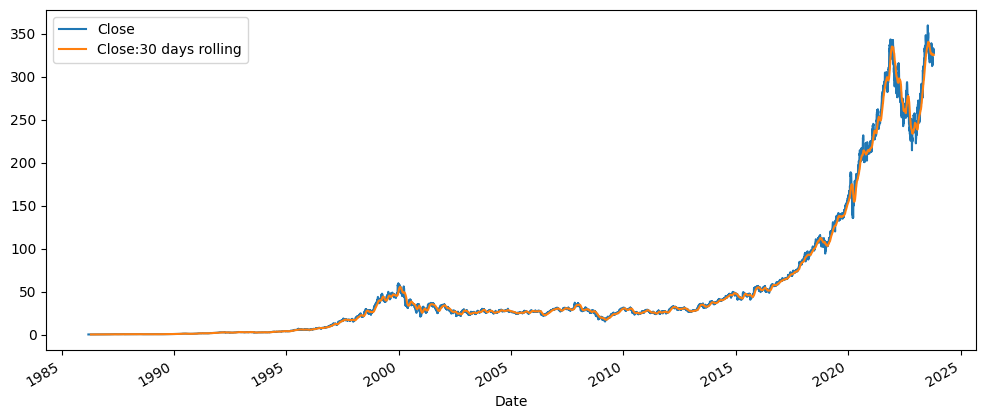

In [188]:
df_mcd[['Close','Close:30 days rolling']].plot(figsize=(12,5))

simple moving average

In [189]:
df_mcd['Close:10 days rolling']=df_mcd['Close'].rolling(window=10,min_periods=1).mean()
df_mcd['Close:20 days rolling']=df_mcd['Close'].rolling(window=20,min_periods=1).mean()
df_mcd['Close:30 days rolling']=df_mcd['Close'].rolling(window=30,min_periods=1).mean()
df_mcd['Close:50 days rolling']=df_mcd['Close'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

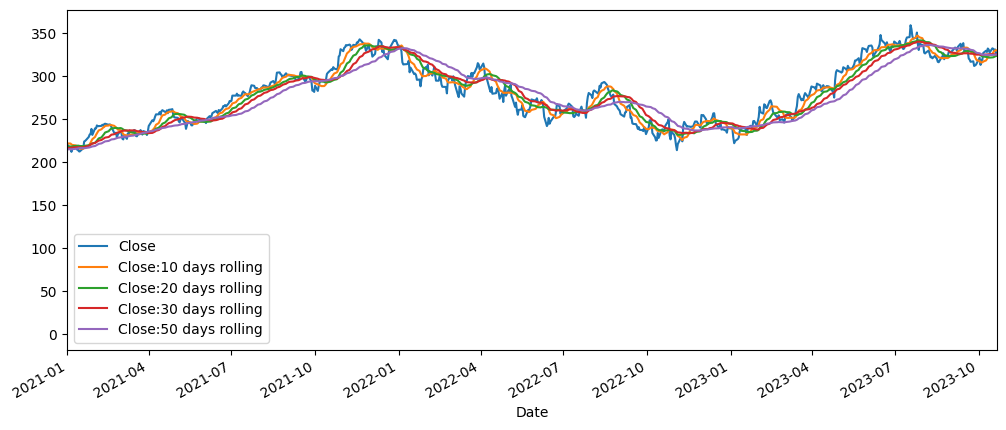

In [190]:
df_mcd[['Close','Close:10 days rolling','Close:20 days rolling','Close:30 days rolling','Close:50 days rolling']].plot(xlim=['2021-01-01','2023-10-21'],figsize=(12,5))

In [191]:
#disadvantage of simple MA
# -gives importance to full data but we are more focused to recent data

<Axes: xlabel='Date'>

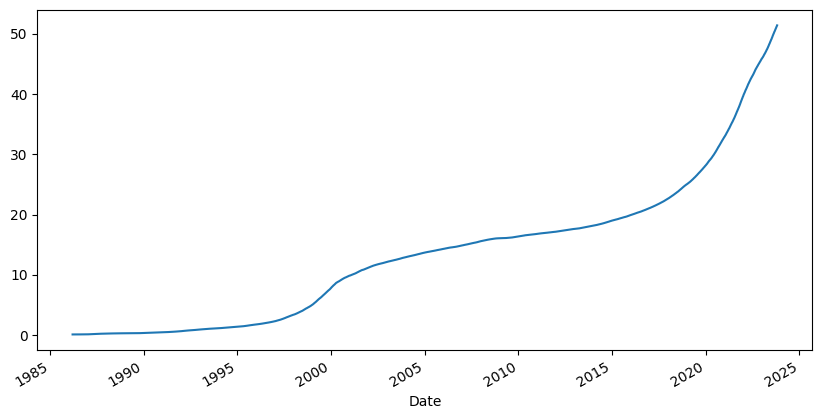

In [192]:
df_mcd['Close'].expanding().mean().plot(figsize=(10,5))

In [193]:
df_mcd['EMA_0.1']=df_mcd['Close'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

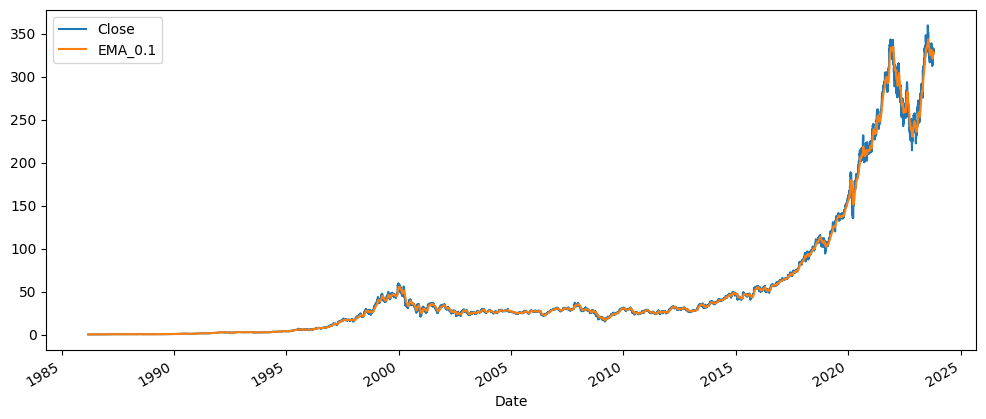

In [194]:
df_mcd[['Close','EMA_0.1']].plot(figsize=(12,5))

In [195]:
df_mcd['EMA_0.3']=df_mcd['Close'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

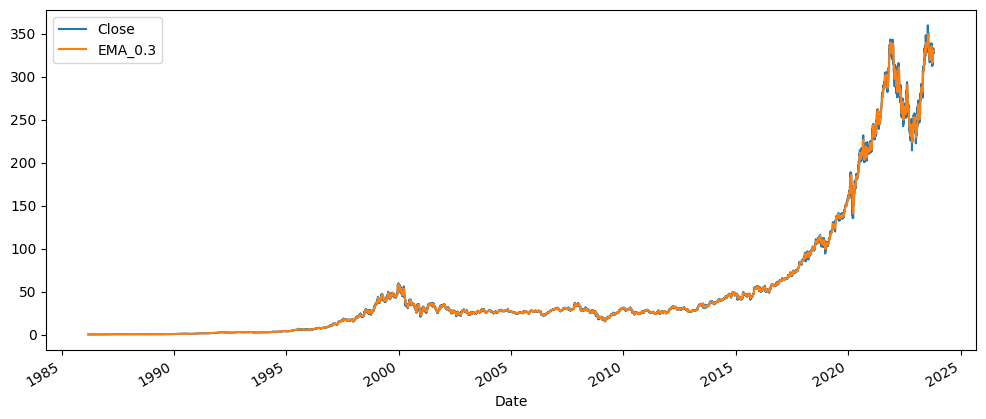

In [196]:
df_mcd[['Close','EMA_0.3']].plot(figsize=(12,5))

In [197]:
df_mcd['EMA_5_days']=df_mcd['Close'].ewm(span=5).mean()

<Axes: xlabel='Date'>

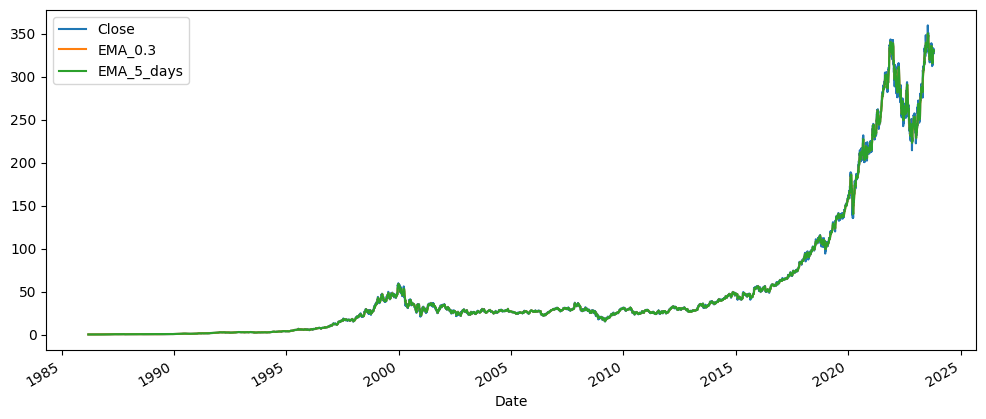

In [198]:
df_mcd[['Close','EMA_0.3','EMA_5_days']].plot(figsize=(12,5))

steps for ARIMA
1. check the dataset for stationary by using dicky fuller test
Ho=unit root=1 =>data is not stationary
H1= unit root <1 => data is stationary
for staionary data the mean and standard deviation should be constant
p<=0.5 Ho rejected 
p>0.5 Ho accepted
If p > 0.05, then the null hypothesis stands true which states that the time series is not stationary.
Else if, p <= 0.05, then the null hypothesis is rejected, and the time series is stationary.
d=differencing for making dataset stationary

2. 

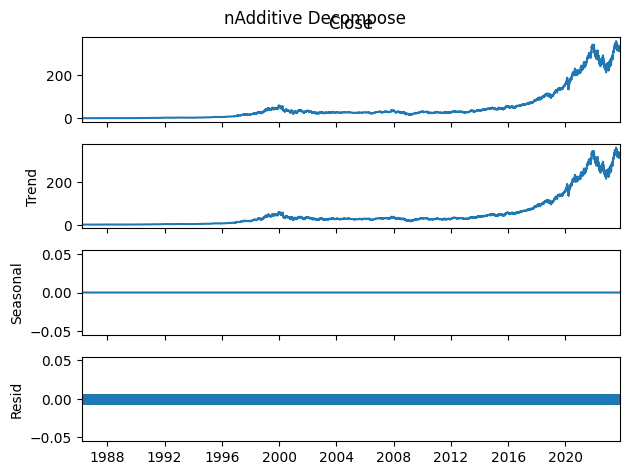

In [205]:
# Additive Decomposition
add_result = seasonal_decompose(df_mcd['Close'], model='additive',period=1)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(df_mcd['Close'], model='multiplicative',period=1)

add_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

In [206]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [207]:
adf_test(df_mcd['Close'])

ADF Statistics: 3.1320453244274464
p- value: 1.0
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [208]:
df_mcd['mcd First Difference']=df_mcd['Close']-df_mcd['Close'].shift(1)

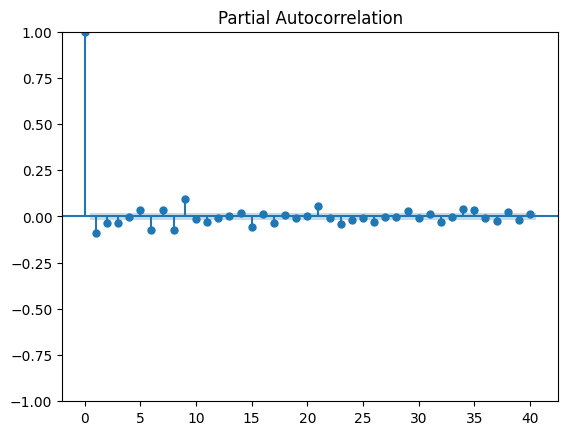

In [209]:
pacf_mcd = plot_pacf(df_mcd["mcd First Difference"].dropna())

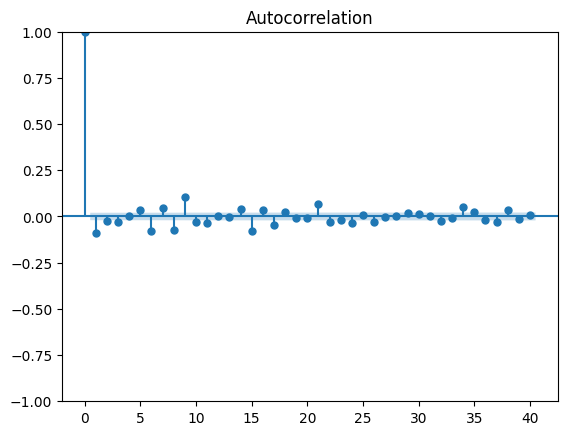

In [210]:
acf_mcd = plot_acf(df_mcd["mcd First Difference"].dropna())

In [211]:
df_mcd.shape

(9481, 14)

In [212]:
df_mcd.tail()

,Open,High,Low,Close,Adj Close,Volume,Close:30 days rolling,Close:10 days rolling,Close:20 days rolling,Close:50 days rolling,EMA_0.1,EMA_0.3,EMA_5_days,mcd First Difference
Date,,,,,,,,,,,,,,
2023-10-18,332.489990,335.589996,328.299988,330.109985,330.109985,23153600,325.695002,329.095004,322.675005,325.094402,326.686450,330.224905,330.441862,-1.950012
2023-10-19,332.149994,336.880005,330.910004,331.320007,331.320007,25052100,325.742002,330.291006,323.264505,325.276202,327.149805,330.553436,330.734577,1.210022
2023-10-20,331.720001,331.920013,325.450012,326.670013,326.670013,25012600,325.488670,330.232007,323.747505,325.351003,327.101826,329.388409,329.379723,-4.649994
2023-10-23,325.470001,332.730011,324.390015,329.320007,329.320007,24374700,325.201337,330.182007,324.336505,325.517203,327.323644,329.367888,329.359818,2.649994
2023-10-24,331.299988,331.839996,327.600006,330.529999,330.529999,26585446,325.160004,330.396005,325.256004,325.647003,327.644280,329.716522,329.749878,1.209991


In [213]:
train_dataset_end=datetime(2016,4,12)
test_dataset_end=datetime(2023,10,24)

In [214]:
train_data=df_mcd[:train_dataset_end]
test_data=df_mcd[train_dataset_end+timedelta(days=1):test_dataset_end]

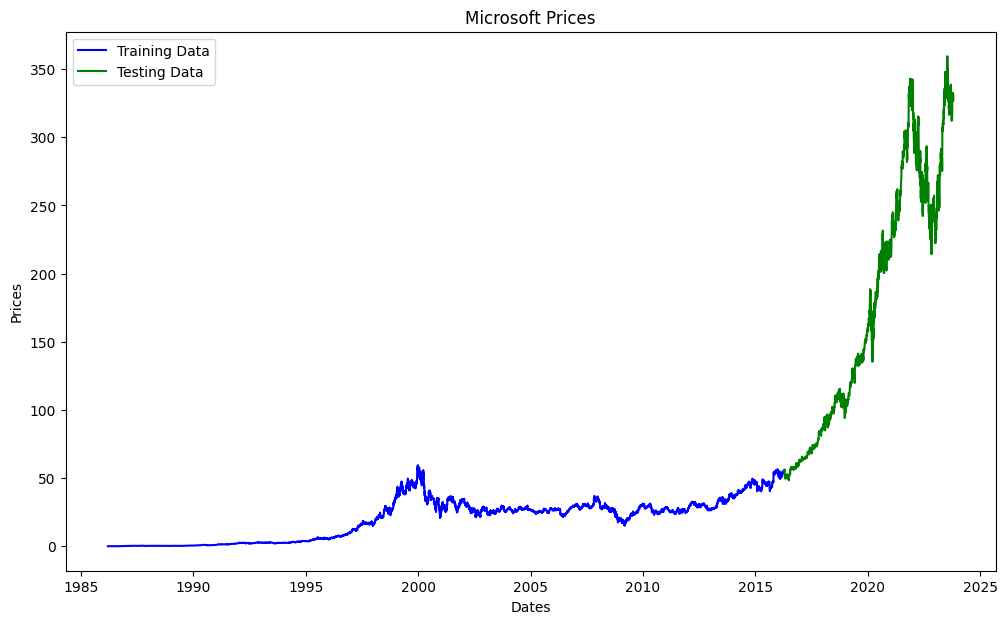

In [215]:
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [216]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-04-13 00:00:00
2023-10-24 00:00:00


In [217]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
print(pred_start)
print(pred_end)

2016-04-13 00:00:00
2023-10-24 00:00:00


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9481
Model:                 ARIMA(3, 1, 5)   Log Likelihood              -18141.800
Date:                Wed, 25 Oct 2023   AIC                          36301.600
Time:                        00:38:57   BIC                          36366.013
Sample:                             0   HQIC                         36323.461
                               - 9481                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9399      0.776     -1.211      0.226      -2.462       0.582
ar.L2          0.4480      1.325      0.338      0.735      -2.148       3.045
ar.L3          0.6648      0.671      0.991      0.3

<Axes: xlabel='Date'>

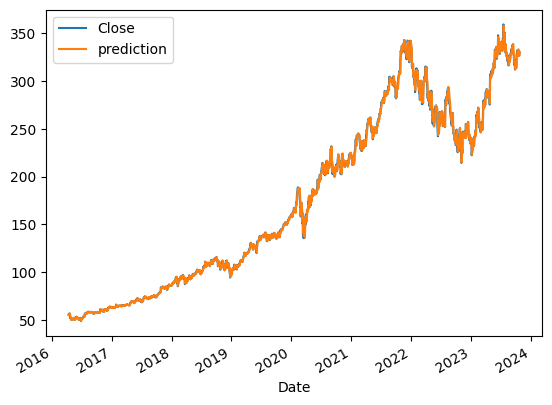

In [218]:
model = sm.tsa.arima.ARIMA(df_mcd["Close"], order=(3,1,5))
model_fit = model.fit()
print(model_fit.summary())
pred3 = model_fit.predict(start= pred_start , end = pred_end)
df_arima3 = pd.DataFrame(test_data['Close'])
df_arima3["prediction"] = pred3
df_arima3.plot()

In [219]:
pred3

Date
2016-04-13     54.683308
2016-04-14     55.230717
2016-04-15     55.370597
2016-04-18     55.546340
2016-04-19     56.425658
                 ...    
2023-10-18    331.549199
2023-10-19    330.072013
2023-10-20    331.625185
2023-10-23    326.691316
2023-10-24    329.584204
Name: predicted_mean, Length: 1897, dtype: float64

In [220]:
test_data['Predicted_ARIMA']=pred3

<Axes: xlabel='Date'>

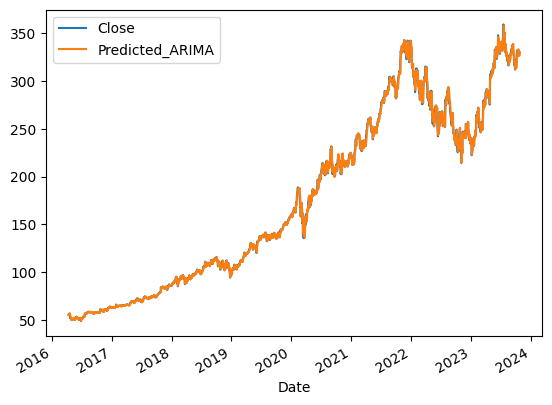

In [221]:
test_data[['Close','Predicted_ARIMA']].plot()

In [223]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_mcd['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=46.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=57255.827, Time=1.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=40233.308, Time=15.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=49428.461, Time=14.66 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=57320.570, Time=1.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=42527.181, Time=3.74 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=39185.716, Time=37.60 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=140.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=98.11 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=57170.571, Time=24.73 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=39158.574, Time=49.35 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=40217.500, Time=24.05 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=150.58 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=94.32 sec
 ARIMA(3,0,0)(2,1,0)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 9481
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -19570.798
Date:                            Wed, 25 Oct 2023   AIC                          39155.595
Time:                                    02:18:01   BIC                          39205.686
Sample:                                         0   HQIC                         39172.597
                                           - 9481                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0428      0.020      2.162      0.031       0.004       0.082
ar.L1          0.8899      0.003    288.113      0.000       0.884       0.896
ar.L2          0.0349      0.004      8.705      0.000       0.027       0.043
ar.L3          0.0231      0.003      6.761      0.000       0.016       0.030
ar.S.L12      -0.6340      0.003   -197.217      0.000      -0.640      -0.628
ar.S.L24      -0.3334      0.003    -95.801      0.000      -0.340      -0.327
sigma2         3.6510      0.015    250.576      0.000       3.622       3.680
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            273772.81
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             290.29   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [225]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
model = sm.tsa.statespace.SARIMAX(df_mcd['Close'],order=(3,0,0),seasonal_order =(2,1,0,12))
model_fit = model.fit()
pred = model_fit.predict(start= pred_start , end = pred_end)
pred 

Date
2016-04-13     54.918939
2016-04-14     54.909515
2016-04-15     55.691735
2016-04-18     55.873516
2016-04-19     56.273786
                 ...    
2023-10-18    334.916224
2023-10-19    326.312381
2023-10-20    332.548921
2023-10-23    326.533243
2023-10-24    329.896742
Name: predicted_mean, Length: 1897, dtype: float64

In [226]:
test_data['Predicted_SARIMA']=pred

In [229]:
plot_data = pd.DataFrame({
    'Close': test_data['Close'],
    'Predicted_ARIMA': pred3,
    'Predicted_SARIMA': pred
})

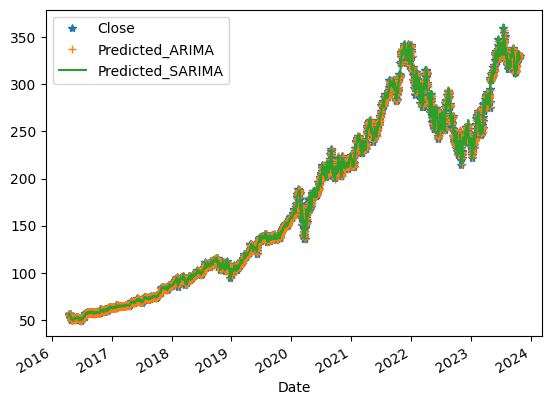

In [240]:
plot_data['Close'].plot(style='*', label='Close')
plot_data['Predicted_ARIMA'].plot(style='+', label='Predicted_ARIMA')
plot_data['Predicted_SARIMA'].plot(label='Predicted_SARIMA')
plt.legend()
plt.show()


In [242]:
from statsmodels.tools.eval_measures import rmse, mse, meanabs
from sklearn.metrics import mean_absolute_percentage_error
mae_arima = meanabs(test_data['Close'], pred3)
mse_arima = mse(test_data['Close'], pred3)
rmse_arima = rmse(test_data['Close'], pred3)
mape_arima = mean_absolute_percentage_error(test_data['Close'], pred3)

mae_sarima = meanabs(test_data['Close'], pred)
mse_sarima = mse(test_data['Close'], pred)
rmse_sarima = rmse(test_data['Close'], pred)
mape_sarima = mean_absolute_percentage_error(test_data['Close'], pred)

# Print the metrics
print("ARIMA:")
print(f"MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")

print("SARIMA:")
print(f"MAE: {mae_sarima}, MSE: {mse_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")

ARIMA:
MAE: 2.252689191559244, MSE: 12.356350952368631, RMSE: 3.5151601602727336, MAPE: 0.0119979112687905
SARIMA:
MAE: 2.650222442926662, MSE: 16.854895336456153, RMSE: 4.1054713902859135, MAPE: 0.014114511075071627


# SOME IMPORTANT POINTS FOR TIME-SERIES

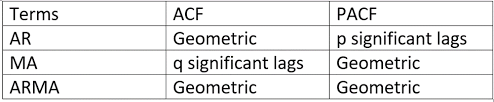

In [199]:
#INTERVIEW: WHERE PACF AND ACF PLOTS ARE USED?
from IPython.display import Image
Image(filename=r'C:\Users\wania_96\Desktop\Untitled Folder\images.png')

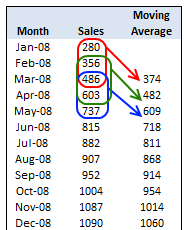

In [200]:
#MA MODELS:
Image(filename=r'C:\Users\wania_96\Desktop\Untitled Folder\calculate-moving-average.png')

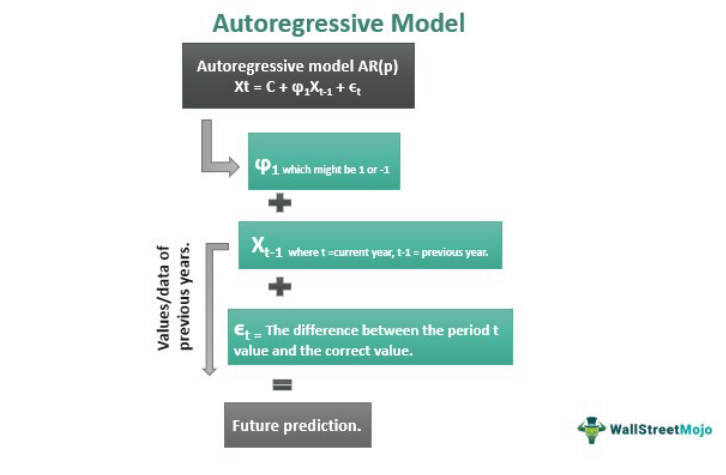

In [201]:
# AR MODEL
Image(filename=r'C:\Users\wania_96\Desktop\Untitled Folder\Autoregressive-Model.png')

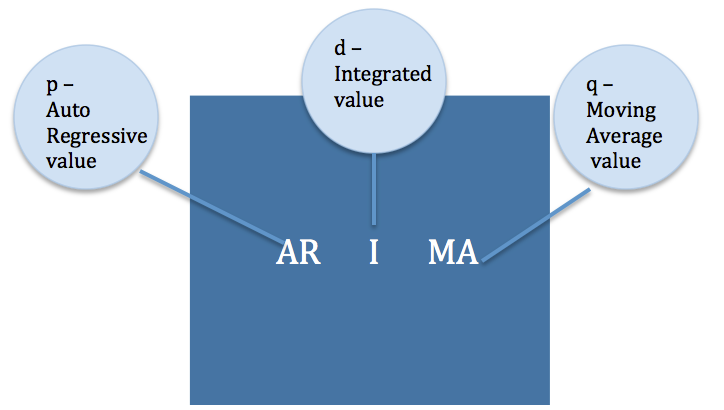

In [202]:
Image(filename=r'C:\Users\wania_96\Desktop\Untitled Folder\1_kTx1d0HmZckSxf5BOaANGg.png')

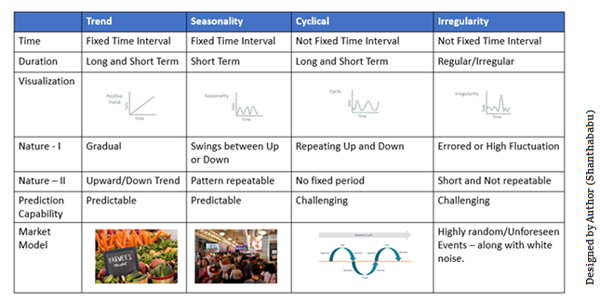

In [204]:
Image(filename=r'C:\Users\wania_96\Desktop\Untitled Folder\39815Components of Time Series Analysis.png')